In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.50)

In [ ]:
image_path = "test/4.jpg"
import cv2 
import numpy as np
def load_image(addr):
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    img = cv2.imread(addr)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    return img
xtest=load_image(image_path)
xtest = np.expand_dims(xtest,axis=0)

In [ ]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph("saved_models/catvdog.ckpt.meta")
    saver.restore(sess,tf.train.latest_checkpoint("saved_models/"))
    graph = tf.get_default_graph()
#     writer = tf.summary.FileWriter(logdir='./testgraph/',graph=graph)
#     writer.close()
    with tf.name_scope('prediction'):
        y_pred = graph.get_tensor_by_name("prediction/y_pred:0")
    with tf.name_scope('x_placeholders'):
        x_true = graph.get_tensor_by_name("x_placeholders/x_true:0")
    p = sess.run(y_pred,feed_dict={x_true:xtest})
    prediction = sess.run(tf.argmax(p,axis=1))

In [ ]:
prediction

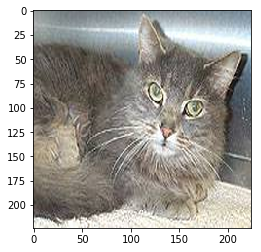

In [51]:
xtest = np.uint8(xtest)
plt.imshow(np.squeeze(xtest))
# plt.title(prediction[i])

In [23]:
!tensorboard --logdir="./testgraph//"

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-05-30 13:34:35.250614: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2018-05-30 13:34:36.327509: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1356] Found device 0 with properties: 
name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.683
pciBusID: 0000:17:00.0
totalMemory: 10.91GiB freeMemory: 145.38MiB
2018-05-30 13:34:36.327564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1435] Adding visible gpu devices: 0
2018-05-30 13:34:36.880660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:923] Device interconnect StreamExecutor with 